# Prosjekt Del 1

## Laster inn moduler 

In [1389]:
#SJEKK OM ALLE MODULENE ER LOVLIGE I OPPGAVEBESKRIVELSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Innstillinger for å få en mer omfattende visning av alle dataframene

In [1390]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.expand_frame_repr", False)

## Laster inn filer (rådata)

In [1391]:
demographic_df = pd.read_csv("./raw_data/demographic.csv")
hospital_df = pd.read_csv("./raw_data/hospital.csv")
phychological_df = pd.read_csv("./raw_data/physiological.txt", sep="\t")
severity_df = pd.read_json("./raw_data/severity.json")

### Analyserer datasettene

In [1392]:
print(f'Shape of physiological_df: {phychological_df.shape}')
phychological_df.head()

Shape of physiological_df: (7740, 15)


,pasient_id,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde
0,2,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN
1,3,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN
2,4,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN
3,5,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN
4,6,110.0,10.398438,101.0,44.0,38.39844,266.62500,NaN,NaN,0.699951,140.0,7.659180,NaN,NaN,NaN


In [1393]:
nan_values = phychological_df.isna().sum()
print(nan_values)

pasient_id                 0
blodtrykk                  0
hvite_blodlegemer        175
hjertefrekvens             0
respirasjonsfrekvens       0
kroppstemperatur           0
lungefunksjon           1944
serumalbumin            2849
bilirubin               2196
kreatinin                 57
natrium                    0
blod_ph                 1912
glukose                 3823
blodurea_nitrogen       3692
urinmengde              4113
dtype: int64


In [1394]:
# Substituerer NaN verdier i fysiologiske data med eksempelverdier. 

phychological_df["serumalbumin"].fillna(3.5,inplace=True)
phychological_df["bilirubin"].fillna(1.01,inplace=True)
phychological_df["kreatinin"].fillna(1.01,inplace=True)
phychological_df["hvite_blodlegemer"].fillna(9,inplace=True) 
phychological_df["urinmengde"].fillna(2502,inplace=True)
phychological_df["blodurea_nitrogen"].fillna(6.5, inplace=True)


C:\Users\andre\AppData\Local\Temp\ipykernel_13228\4284118894.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\andre\AppData\Local\Temp\ipykernel_13228\4284118894.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [1395]:
phychological_df.describe(include="all")

,pasient_id,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde
count,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,5796.000000,7740.000000,7740.000000,7740.000000,7740.000000,5828.000000,3917.000000,7740.00000,7740.000000
mean,4540.665375,84.412468,12.227368,97.283940,23.348450,37.116579,239.608379,3.154105,2.124243,1.784532,137.574160,7.415439,160.031146,20.14084,2353.639005
std,2636.463416,27.713746,9.017879,31.499505,9.549561,1.257278,109.942808,0.754716,4.555226,1.706914,6.029887,0.080844,87.828819,23.36813,1011.035013
min,2.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.00000,0.000000
25%,2244.750000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.699707,0.599976,0.899902,134.000000,7.379883,103.000000,6.50000,2050.000000
50%,4539.500000,77.000000,10.398438,100.000000,24.000000,36.695310,223.984375,3.500000,1.010000,1.199951,137.000000,7.419922,135.000000,6.50000,2502.000000
75%,6816.250000,107.000000,15.099609,120.000000,28.000000,38.195310,304.750000,3.500000,1.299805,1.899902,141.000000,7.469727,190.000000,25.00000,2502.000000
max,9105.000000,195.000000,128.781250,232.000000,90.000000,41.695310,869.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,192.00000,9000.000000


In [1396]:
print(f'Shape of demographic_df: {demographic_df.shape}')

# Sjekker om høyere antall rader skyldes duplikasjoner. 
duplicated_count = demographic_df.duplicated().sum()
print(f'Numer of duplicated patients: {duplicated_count}')

demographic_df.head()

Shape of demographic_df: (7742, 6)
Numer of duplicated patients: 2


,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet
0,2,60.33899,female,12.0,$11-$25k,white
1,3,52.74698,female,12.0,under $11k,white
2,4,42.38498,female,11.0,under $11k,white
3,5,79.88495,female,NaN,NaN,white
4,6,93.01599,male,14.0,NaN,white


In [1397]:
demographic_df.describe(include="all")

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet
count,7742.000000,7742.000000,7742,6360.000000,5223,7705
unique,NaN,NaN,2,NaN,4,5
top,NaN,NaN,male,NaN,under $11k,white
freq,NaN,NaN,4370,NaN,2426,6120
mean,4539.500517,62.710904,NaN,11.752987,NaN,NaN
std,2637.118792,15.688113,NaN,3.458671,NaN,NaN
min,2.000000,-1.000000,NaN,0.000000,NaN,NaN
25%,2243.250000,52.915240,NaN,10.000000,NaN,NaN
50%,4538.500000,65.008000,NaN,12.000000,NaN,NaN
75%,6815.750000,74.131487,NaN,14.000000,NaN,NaN


In [1398]:
print(f'Shape of demographic_df: {hospital_df.shape}')
hospital_df.head()

Shape of demographic_df: (7740, 3)


,pasient_id,sykehusdød,oppholdslengde
0,2,1,4
1,3,0,17
2,4,0,3
3,5,0,-99
4,6,1,4


In [1399]:
hospital_df.describe(include="all")

,pasient_id,sykehusdød,oppholdslengde
count,7740.000000,7740.000000,7740.000000
mean,4540.665375,0.263178,17.728682
std,2636.463416,0.440387,21.995401
min,2.000000,0.000000,-99.000000
25%,2244.750000,0.000000,6.000000
50%,4539.500000,0.000000,11.000000
75%,6816.250000,1.000000,20.000000
max,9105.000000,1.000000,343.000000


Håndterer manglende verdier i fysiologiske data med anbefalte eksempelverdier fra: https://archive.ics.uci.edu/dataset/880/support2
 

## Håndtering av .json fil (Serverity data)

Denne filen kommer i et annet format, der alle kolonnene utenom de to første er lister. For å kunne slå sammen alle DataFrame-ene til én felles DataFrame, er det nødvendig at alle har samme format. Derfor velger jeg å bruke explode(). Når jeg bruker explode() på en kolonne, vil hver verdi i listen bli plassert i sin egen rad, mens de andre kolonneverdiene i samme rad forblir uendret. Dette betyr at h\for hver listeverdi i en olnne vil det opprettes en ny rad, noe som effektivt "utvider" Dataframen. Dette trinnet er avgjørende for å forbedre dataene for videre behandling, som for eksempel modellering og statistisk analyse

In [1400]:
severity_df.head()

,sykdomskategori_id,sykdomskategori,pasient_id,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,A1s,ARF/MOSF,"[5, 15, 18, 23, 28, 34, 39, 43, 46, 47, 48, 58...","[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...","[ARF/MOSF w/Sepsis, ARF/MOSF w/Sepsis, ARF/MOS...","[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 3, 1, 3, ...","[26.0, 26.0, 26.0, 0.0, 26.0, 37.0, 0.0, 0.0, ...","[None, None, None, None, None, None, None, Non...","[2.0, None, 0.0, 5.0, 2.0, None, 0.0, None, No...","[23.5, 30.5, 40.296875, 31.6992188, 46.796875,...","[30.0, 39.0, 58.0, 42.0, 85.0, 49.0, 5.0, 76.0...","[0.6348876950000001, 0.590942383, 0.2129821780...","[0.5329589840000001, 0.481994629, 0.1169891360...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[no, no, no, no, yes, no, no, no, no, no, yes,...","[0.899999619, 0.899999619, 0.09999996400000001...","[0.9, 0.9, 0.001, 0.5, 0.000125, 0.60000000000...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
1,BrY,COPD/CHF/Cirrhosis,"[2, 3, 7, 8, 11, 13, 14, 19, 20, 30, 31, 32, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...","[Cirrhosis, Cirrhosis, CHF, CHF, CHF, Cirrhosi...","[2, 2, 1, 3, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, ...","[44.0, 0.0, 0.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[None, 1.0, 0.0, None, 2.0, 0.0, 0.0, 7.0, 3.0...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 7.0, None,...","[52.6953125, 20.5, 17.296875, 21.5976562, 14.5...","[74.0, 45.0, 46.0, 53.0, 14.0, 30.0, 34.0, 42....","[0.000999928, 0.790893555, 0.892944336, 0.6708...","[0.0, 0.6649169920000001, 0.820922852, 0.49896...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[no, no, no, no, no, no, no, no, no, no, no, n...","[0.0, 0.75, None, 0.799999714, 0.699999809, No...","[0.0, 0.5, 0.7000000000000001, 0.4, 0.5, None,...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
2,ChE,Cancer,"[4, 9, 10, 12, 16, 17, 21, 24, 27, 41, 42, 54,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[Lung Cancer, Lung Cancer, Colon Cancer, Lung ...","[2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, ...","[0.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0...","[0.0, None, 0.0, 1.0, 2.0, None, 0.0, None, No...","[0.0, 7.0, None, 1.0, 0.0, None, 0.0, None, No...","[20.0976562, 15.8984375, 2.2998047, 16.3984375...","[19.0, 17.0, 9.0, 17.0, 11.0, 4.0, 16.0, 11.0,...","[0.6989746090000001, 0.570922852, 0.9528808590...","[0.411987305, 0.24899292, 0.8879394530000001, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[metastatic, metastatic, metastatic, metastati...","[0.899999619, 0.049999982000000005, None, None...","[0.5, 0.000125, None, None, 0.7000000000000001...","[None, dnr ved innleggelse, None, None, None, ...","[None, 0.0, None, None, None, None, None, None..."
3,DWw,Coma,"[6, 162, 188, 250, 252, 262, 275, 309, 323, 35...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[Coma, Coma, Coma, Coma, Coma, Coma, Coma, Com...","[1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, ...","[55.0, 61.0, 94.0, 55.0, 94.0, 100.0, 100.0, 5...","[None, None, None, None, None, None, None, Non...","[1.0, None, None, 1.0, None, None, None, None,...","[19.3984375, 30.3984375, 20.296875, 30.8984375...","[27.0, 36.0, 22.0, 53.0, 40.0, 25.0, 58.0, 16....","[0.28497314500000004, 0.438964844, 0.280944824...","[0.214996338, 0.365966797, 0.211975098, 0.2729...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[no, no, no, no, yes, no, no, no, no, no, no, ...","[0.0, None, None, None, None, 0.09999996400000...","[0.0, None, N

## Kommentar etter bruk av explode() på df_severity

Dataen ser fin og oversiktelig ut. Inneholder rikelig med binære verdier. Binære verdier er ideelt for modelleringen som skal gjøres i del 2. Dette fordi binære verdier gir enkelhet, effektivitet og klare klassifiseringsmuligheter.

In [1401]:
# Bruker explode() på kolonner med lister i.

columns_to_list = severity_df.columns.to_list()
valid_columns = columns_to_list[2:]
severity_df = severity_df.explode(valid_columns, ignore_index=True)

In [1402]:
print(f'Shape of severity_df: {severity_df.shape}')
severity_df.head()

Shape of severity_df: (7740, 20)


,sykdomskategori_id,sykdomskategori,pasient_id,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,A1s,ARF/MOSF,5,0,ARF/MOSF w/Sepsis,1,26.0,None,2.0,23.5,30.0,0.634888,0.532959,0,0,no,0.9,0.9,None,None
1,A1s,ARF/MOSF,15,0,ARF/MOSF w/Sepsis,1,26.0,None,None,30.5,39.0,0.590942,0.481995,0,0,no,0.9,0.9,None,None
2,A1s,ARF/MOSF,18,1,ARF/MOSF w/Sepsis,0,26.0,None,0.0,40.296875,58.0,0.212982,0.116989,0,0,no,0.1,0.001,None,None
3,A1s,ARF/MOSF,23,0,ARF/MOSF w/Sepsis,1,0.0,None,5.0,31.699219,42.0,0.650879,0.55188,0,0,no,0.6,0.5,None,None
4,A1s,ARF/MOSF,28,1,MOSF w/Malig,1,26.0,None,2.0,46.796875,85.0,0.021,0.004999,0,0,yes,0.05,0.000125,None,None


In [1403]:
severity_df.describe(include="all")

,sykdomskategori_id,sykdomskategori,pasient_id,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
count,7740,7740,7740,7740,7740,7740,7740.0,2942.0,5299.0,7740.000000,7740.0,7740.0,7740.0,7740,7740,7740,6319.0,6333.0,1070,1070.0
unique,4,4,7740,2,8,10,11.0,8.0,8.0,584.000000,124.0,939.0,935.0,2,2,3,48.0,80.0,2,18.0
top,A1s,ARF/MOSF,5,1,ARF/MOSF w/Sepsis,1,0.0,0.0,0.0,20.699219,32.0,0.0,0.0,0,0,no,0.5,0.5,dnr ved innleggelse,0.0
freq,3618,3618,1,5317,3002,2572,5419.0,1576.0,2633.0,52.000000,198.0,125.0,175.0,6222,7480,5086,892.0,947.0,858,896.0


## Slår alle dataframene sammen i et felles datasett. 

For at det skal være mulig å slå dataframene sammen ved hjelp av concat() er det nødvendig at alle dataframene har likt antall rader. Hvis ikke kan analyse føre til uventede resultater, som duplikater eller manglende data

In [1404]:
# Fjerner duplikater i demografisk data. Da har alle datasettene like mange rader, og kan sammenslås

demographic_df = demographic_df.drop_duplicates()

print('Demographic data:', demographic_df.shape)
print('Hospital data:', hospital_df.shape)
print('Physiological data:', phychological_df.shape)
print('Severity data:', severity_df.shape)

Demographic data: (7740, 6)
Hospital data: (7740, 3)
Physiological data: (7740, 15)
Severity data: (7740, 20)


In [1405]:
# Tilbakestiller indeksene.

demographic_df = demographic_df.reset_index(drop=True)
hospital_df = hospital_df.reset_index(drop=True).drop(columns=['pasient_id'])
phychological_df = phychological_df.reset_index(drop=True).drop(columns=['pasient_id'])
severity_df = severity_df.reset_index(drop=True).drop(columns=['pasient_id'])

# Slår så sammen datasettene til et stort datasett: df
df = pd.concat([demographic_df, hospital_df, phychological_df, severity_df], axis=1)

### Undersøker sammenslått datasett






In [1406]:
print(f'Shape of DataFrame (df): {df.shape}')
df.head()

Shape of DataFrame (df): (7740, 41)


,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,sykdomskategori,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,2,60.33899,female,12.0,$11-$25k,white,1,4,43.0,17.097656,112.0,34.0,34.59375,98.00000,3.5,1.010000,5.500000,132.0,7.250000,NaN,6.5,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,26.0,None,2.0,23.5,30.0,0.634888,0.532959,0,0,no,0.9,0.9,None,None
1,3,52.74698,female,12.0,under $11k,white,0,17,70.0,8.500000,88.0,28.0,37.39844,231.65625,3.5,2.199707,2.000000,134.0,7.459961,NaN,6.5,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,26.0,None,None,30.5,39.0,0.590942,0.481995,0,0,no,0.9,0.9,None,None
2,4,42.38498,female,11.0,under $11k,white,0,3,75.0,9.099609,88.0,32.0,35.00000,NaN,3.5,1.010000,0.799927,139.0,NaN,NaN,6.5,2502.0,A1s,ARF/MOSF,1,ARF/MOSF w/Sepsis,0,26.0,None,0.0,40.296875,58.0,0.212982,0.116989,0,0,no,0.1,0.001,None,None
3,5,79.88495,female,NaN,NaN,white,0,-99,59.0,13.500000,112.0,20.0,37.89844,173.31250,3.5,1.010000,0.799927,143.0,7.509766,NaN,6.5,2502.0,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,0.0,None,5.0,31.699219,42.0,0.650879,0.55188,0,0,no,0.6,0.5,None,None
4,6,93.01599,male,14.0,NaN,white,1,4,110.0,10.398438,101.0,44.0,38.39844,266.62500,3.5,1.010000,0.699951,140.0,7.659180,NaN,6.5,2502.0,A1s,ARF/MOSF,1,MOSF w/Malig,1,26.0,None,2.0,46.796875,85.0,0.021,0.004999,0,0,yes,0.05,0.000125,None,None


In [1407]:
df.describe(include="all")

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,sykdomskategori,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
count,7740.000000,7740.000000,7740,6359.000000,5222,7703,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,5796.000000,7740.000000,7740.000000,7740.000000,7740.000000,5828.000000,3917.000000,7740.00000,7740.000000,7740,7740,7740.0,7740,7740.0,7740.0,2942.0,5299.0,7740.000000,7740.0,7740.0,7740.0,7740.0,7740.0,7740,6319.0,6333.0,1070,1070.0
unique,NaN,NaN,2,NaN,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2.0,8,10.0,11.0,8.0,8.0,584.000000,124.0,939.0,935.0,2.0,2.0,3,48.0,80.0,2,18.0
top,NaN,NaN,male,NaN,under $11k,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1s,ARF/MOSF,1.0,ARF/MOSF w/Sepsis,1.0,0.0,0.0,0.0,20.699219,32.0,0.0,0.0,0.0,0.0,no,0.5,0.5,dnr ved innleggelse,0.0
freq,NaN,NaN,4370,NaN,2425,6118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3618,3618,5317.0,3002,2572.0,5419.0,1576.0,2633.0,52.000000,198.0,125.0,175.0,6222.0,7480.0,5086,892.0,947.0,858,896.0
mean,4540.665375,62.712258,NaN,11.753106,NaN,NaN,0.263178,17.728682,84.412468,12.227368,97.283940,23.348450,37.116579,239.608379,3.154105,2.124243,1.784532,137.574160,7.415439,160.031146,20.14084,2353.639005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2636.463416,15.688039,NaN,3.458930,NaN,NaN,0.440387,21.995401,27.713746,9.017879,31.499505,9.549561,1.257278,109.942808,0.754716,4.555226,1.706914,6.029887,0.080844,87.828819,23.36813,1011.035013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,-1.000000,NaN,0.000000,NaN,NaN,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2244.750000,52.921740,NaN,10.000000,NaN,NaN,0.000000,6.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.699707,0.599976,0.899902,134.000000,7.379883,103.000000,6.50000,2050.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4539.500000,65.008000,NaN,12.000000,NaN,NaN,0.000000,11.000000,77.000000,10.398438,100.000000,24.000000,36.695310,223.984375,3.500000,1.010000,1.199951,137.000000,7.419922,135.000000,6.50000,2502.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6816.250000,74.133747,NaN,14.000000,NaN,NaN,1.000000,20.000000,107.000000,15.099609,120.000000,28.000000,38.195310,304.750000,3.500000,1.299805,1.899902,141.000000,7.469727,190.000000,25.00000,2502.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pasient_id                     7740 non-null   int64  
 1   alder                          7740 non-null   float64
 2   kjønn                          7740 non-null   object 
 3   utdanning                      6359 non-null   float64
 4   inntekt                        5222 non-null   object 
 5   etnisitet                      7703 non-null   object 
 6   sykehusdød                     7740 non-null   int64  
 7   oppholdslengde                 7740 non-null   int64  
 8   blodtrykk                      7740 non-null   float64
 9   hvite_blodlegemer              7740 non-null   float64
 10  hjertefrekvens                 7740 non-null   float64
 11  respirasjonsfrekvens           7740 non-null   float64
 12  kroppstemperatur               7740 non-null   f

#### Databehandling

Å konvertere kolonner fra objekt til numerisk format er en viktig del av datarengjøring og forberedelse før analysering og modellering. Det sikrer at dataene er i et format som kan brukes effektivt og korrekt av maskinlæringsalgoritmer og statistiske analyser.

In [1409]:
# Konverterer kolonnene fra objekt til numerisk format. Denne forberedelsen er viktig før analyse og modellering.

df[['dødsfall','antall_komorbiditeter' ,'koma_score' ,'adl_pasient' ,'adl_stedfortreder' ,'fysiologisk_score' ,'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens', 'lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']] = df[['dødsfall', 'antall_komorbiditeter', 'koma_score', 'adl_pasient', 'adl_stedfortreder', 'fysiologisk_score','apache_fysiologisk_score' ,'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens','lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']].apply(pd.to_numeric)

#### Ser på verdier som ikke gir mening

In [1410]:
# Merker fra df.describe() at det finnes pasienter med negativ oppholdslengde. Disse verdiene må behandles.

negativ_oppholdslengde = df[df["oppholdslengde"] < 0]
len(negativ_oppholdslengde)

6

In [1411]:
# Merker fra df.describe() at det finnes pasienter med negativ alder. Disse verdiene må behandles.

negativ_alder = df[df["alder"] < 0]
len(negativ_alder)

5

#### Fjerner kolonnene som ikke er relevante

* Dødsfall: Ikke relevant for prediksjon av oppholdslengde. Dødsfall skjer ikke nødvendigvis på dag én (når oppholdslengde skal predikeres).

* Pasient_id: ikke nødvendig, vi indekserer heller hver rad.

* Sykehusdød: fjernes av samme grunn som dødsfall.

* adl_pasient: dataen hentes ved dag 7. Kan ha dårlig innvirkning på prediksjon av oppholdslengde på dag én.

* Bilirubin: fjernes av samme grunn som adl_pasient.

* Sykdomskategori_id: fjernes fordi den har samme funksjon som sykdomskategori.


In [1412]:
# Fjerner pasientene med negativ oppholdslengde og alder. 

df = df[df["oppholdslengde"] >= 0]
df = df[df["alder"] >= 0]

irrelevant_columns = ["dødsfall", "pasient_id", "sykehusdød", "adl_pasient", "bilirubin", "sykdomskategori_id"]

df = df.drop(columns=irrelevant_columns, axis=1)

## Dele inn i trenings-, validerings- og testdata



In [1413]:
seed = 42

# Splitter data i trenings- og testsett. 
X = df.drop(columns=["oppholdslengde"])
y = df["oppholdslengde"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True)

# Deler opp testsettet i validerings- og testsett.
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, shuffle=True)

# Resetter indekser. Sikrer en konsistent struktur i dataene for videre behandling.
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True) 


## One-hot-encoding

In [1414]:
#One hot encoder på kategorisk data.
cols_to_encode = ["kjønn", "inntekt", "etnisitet", "sykdomskategori", "sykdom_underkategori", "kreft", "dnr_status"]

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_transformed = one_hot_encoder.fit_transform(X_train[cols_to_encode])
X_train_encoded = pd.DataFrame(X_train_transformed, columns=one_hot_encoder.get_feature_names_out(cols_to_encode))
X_train_encoded = X_train_encoded.astype(int)

X_train = pd.concat([X_train.drop(columns=cols_to_encode).reset_index(drop=True), X_train_encoded], axis=1)

X_val_transformed = one_hot_encoder.transform(X_val[cols_to_encode])
X_val_encoded = pd.DataFrame(X_val_transformed, columns=one_hot_encoder.get_feature_names_out(cols_to_encode))
X_val_encoded = X_val_encoded.astype(int)

X_val = pd.concat([X_val.drop(columns=cols_to_encode).reset_index(drop=True), X_val_encoded], axis=1)

X_test_transformed = one_hot_encoder.transform(X_test[cols_to_encode])
X_test_encoded = pd.DataFrame(X_test_transformed, columns=one_hot_encoder.get_feature_names_out(cols_to_encode))
X_test_encoded = X_test_encoded.astype(int)

X_test = pd.concat([X_test.drop(columns=cols_to_encode).reset_index(drop=True), X_test_encoded], axis=1)

In [1415]:
print(f'Shape of X_train: {X_train.shape}')
X_train.describe()

Shape of X_train: (5410, 58)


,alder,utdanning,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,antall_komorbiditeter,koma_score,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_dag,kjønn_female,kjønn_male,inntekt_$11-$25k,inntekt_$25-$50k,inntekt_>$50k,inntekt_under $11k,inntekt_nan,etnisitet_asian,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,etnisitet_nan,sykdomskategori_ARF/MOSF,sykdomskategori_COPD/CHF/Cirrhosis,sykdomskategori_Cancer,sykdomskategori_Coma,sykdom_underkategori_ARF/MOSF w/Sepsis,sykdom_underkategori_CHF,sykdom_underkategori_COPD,sykdom_underkategori_Cirrhosis,sykdom_underkategori_Colon Cancer,sykdom_underkategori_Coma,sykdom_underkategori_Lung Cancer,sykdom_underkategori_MOSF w/Malig,kreft_metastatic,kreft_no,kreft_yes,dnr_status_dnr før innleggelse,dnr_status_dnr ved innleggelse,dnr_status_None
count,5410.000000,4433.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,4055.000000,5410.000000,5410.000000,5410.000000,4080.000000,2743.000000,5410.000000,5410.000000,5410.000000,5410.000000,3725.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,4430.000000,4443.000000,749.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,62.815565,11.796752,84.693438,12.340621,97.618983,23.406654,37.138702,239.760818,3.146953,1.766745,137.622921,7.413809,160.639810,20.095952,2361.892564,1.883549,11.861183,1.620940,25.487426,37.566543,0.637066,0.521214,0.198152,0.034381,0.618467,0.499634,-0.443258,0.434381,0.565619,0.172089,0.114603,0.078004,0.308133,0.327172,0.009982,0.154713,0.031423,0.011460,0.787616,0.004806,0.464140,0.312939,0.158780,0.064140,0.385397,0.154344,0.104067,0.054529,0.060444,0.064140,0.098336,0.078743,0.203142,0.657856,0.139002,0.025878,0.112569,0.861553
std,15.450071,3.499803,27.808522,9.384883,31.305589,9.554365,1.266966,111.034599,0.699742,1.667329,6.032462,0.081830,88.241442,23.125980,1031.275377,1.357697,24.496764,2.220811,9.970226,19.957788,0.248934,0.254363,0.398644,0.182222,0.298837,0.305330,3.482354,0.495721,0.495721,0.377492,0.318571,0.268202,0.461765,0.469224,0.099417,0.361665,0.174475,0.106447,0.409033,0.069164,0.498759,0.463733,0.365505,0.245026,0.486734,0.361311,0.305375,0.227079,0.238329,0.245026,0.297797,0.269362,0.402375,0.474471,0.345980,0.158786,0.316095,0.345401
min,18.146000,0.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.199982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.971980,10.000000,64.000000,7.000000,72.000000,18.000000,36.195310,155.000000,2.699707,0.899902,134.000000,7.379883,103.500000,6.500000,2071.250000,1.000000,0.000000,0.000000,18.898438,23.000000,0.507935,0.345947,0.000000,0.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,65.078490,12.000000,77.000000,10.398438,100.000000,

#### Korrelasjonsmatrise (treningsdata) (går under statistisk analyse)

En korrelasjonsmatrise er et nyttig verktøy for å undersøke sammenhenger mellom variablene i datasettet. Den kan hjelpe med å identifisere potensielle årsaksforhold og avdekke skjulte mønstre som ellers kan være vanskelige å oppdage.

I denne matrisen ser det ved første øyekast ut til å være svake lineære sammenhenger mellom variablene. Dette antyder at det er lite sannsynlig at variablene påvirker hverandre direkte i noen vesentlig grad. Det kan også indikere at forholdet mellom variablene er mer komplekst eller ikke-lineært, noe som kan kreve mer avanserte analyser for å avdekke.

In [1416]:
#korrelasjons_matrise = X_train.corr()
#korrelasjons_matrise

# Visualisering --> kjøre koordinerte farger

## (Ikke-helserelaterte variabler)

#### Kjønnsrelaterte sammenhenger
Vi ønsker å få en oversikt over andel pasienter som er kvinner og menn

FARGEKODER: #A3C1DA, #B2D8B2

In [1417]:
# Andel kvinner og menn.

kjonn_data = pd.melt(X_train, value_vars=["kjønn_female", "kjønn_male"], var_name="Kjønn", value_name="Verdi")
kjonn_data['Kjønn'] = kjonn_data['Kjønn'].map({'kjønn_female': 'Kvinne', 'kjønn_male': 'Mann'})
kjonn_data = kjonn_data[kjonn_data['Verdi'] == 1]

total_count = kjonn_data.shape[0]
kjonn_percent = kjonn_data['Kjønn'].value_counts(normalize=True) * 100
kjonn_percent = kjonn_percent.reset_index()
kjonn_percent.columns = ['Kjønn', 'Prosent']

kjonn_figure = px.bar(kjonn_percent, x='Kjønn', y='Prosent', 
                      title='Andel kvinner vs. menn',
                      color='Kjønn',
                      color_discrete_map={"Kvinne": "#A3C1DA", "Mann": "#B2D8B2"},
                      text='Prosent',
                      width=1000, height=400)  # Angi figurens størrelse her

# Juster stolpebredden
kjonn_figure.update_traces(texttemplate='%{text:.2f}%', textposition='inside', width=0.6)  # Smalere stolper

kjonn_figure.show()


In [1418]:
#Gjennomsnittlig oppholdslengde etter kjønn.

combined_df = X_train.copy()
combined_df['oppholdslengde'] = y_train

# Beregn gjennomsnittlig oppholdslengde etter kjønn.
opphold_by_gender = combined_df.groupby(['kjønn_female']).agg({'oppholdslengde': 'mean'}).reset_index()
opphold_by_gender['Kjønn'] = opphold_by_gender['kjønn_female'].map({1: 'Kvinne', 0: 'Mann'})
opphold_by_gender['Gjennomsnittlig Oppholdslengde (dager)'] = round(opphold_by_gender['oppholdslengde'], 1)

# Visualiser som en barplot.
fig1 = px.bar(opphold_by_gender, 
              x='Kjønn', 
              y='Gjennomsnittlig Oppholdslengde (dager)',
              title='Gjennomsnittlig Oppholdslengde etter Kjønn',
              labels={'Gjennomsnittlig Oppholdslengde (dager)': 'Oppholdslengde (dager)', 'Kjønn': 'Kjønn'},
              color='Kjønn',
              color_discrete_map={"Kvinne": "#A3C1DA", "Mann": "#B2D8B2"},
              text='Gjennomsnittlig Oppholdslengde (dager)', 
              width=1000, height = 400)


fig1.update_traces(texttemplate='%{text:.2f}', textposition='inside')

fig1.update_layout(bargap=0.1)
fig1.show()

In [1419]:
# Kjønnsfordeling innen ulike sykdomskategorier.

disease_categories = ['sykdomskategori_ARF/MOSF', 
                     'sykdomskategori_COPD/CHF/Cirrhosis', 
                     'sykdomskategori_Cancer', 
                     'sykdomskategori_Coma']

gender_categories = ['kjønn_female', 'kjønn_male']

for disease in disease_categories:
    disease_data = X_train[X_train[disease] == 1]
    
    gender_count = disease_data[gender_categories].sum()
    
    total = gender_count.sum()
    gender_percent = (gender_count / total) * 100
    
    gender_df = pd.DataFrame({
        'Kjønn': gender_percent.index,
        'Prosent': gender_percent.values
    })

    fig = px.pie(gender_df, 
                 values='Prosent', 
                 names='Kjønn', 
                 title=f'Kjønnsfordeling for {disease.replace("_", " ")}',
                 color_discrete_sequence=['#B2D8B2', '#A3C1DA'],
                 hole=0.3, 
                 width=1000, height=400)

fig.show()

#### Aldersbaserte sammenhenger

Det kan være nyttig å få en oversikt over aldersfordelingen til pasientene.

Det ser ut som at det er en stor andel pasienter i alderen 60-80 år.

Vi merker oss også at det er en pasient med negativ alder. Denne verdien er bemerkelsesverdig og må tas hensyn til i senere datarydding

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

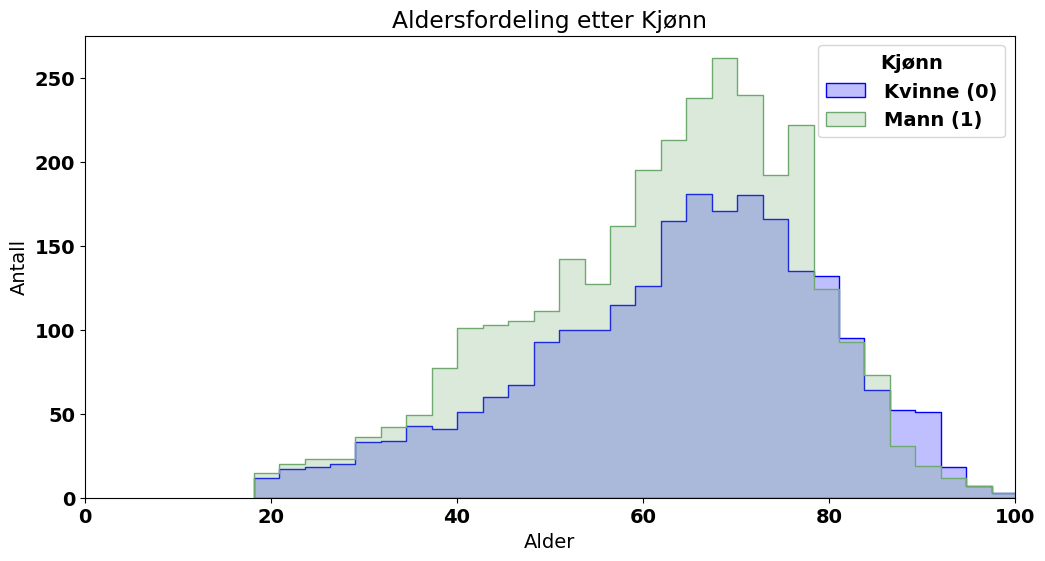

In [1420]:
# Aldersfordeling blant kjønnene

plt.figure(figsize=(12, 6))

sns.histplot(data=X_train, 
             x='alder', 
             hue=X_train['kjønn_female'].map({1: 'Kvinne', 0: 'Mann'}), 
             bins=30, 
             element='step', 
             stat='count', 
             common_norm=False, 
             palette={'Mann': '#6FA96F', 'Kvinne': 'blue'},
             hue_order=['Mann', 'Kvinne'])

plt.xlim(0, 100)

plt.title('Aldersfordeling etter Kjønn')
plt.xlabel('Alder')
plt.ylabel('Antall')

plt.legend(title='Kjønn', loc='upper right', labels=['Kvinne (0)', 'Mann (1)'], handletextpad=1, frameon=True)

plt.show()

#### Påvirker alder oppholdslengde?

Sektordiagrammet illustrerer dødlighet fordelt på aldersgrupper. Som forventet er dødligheten høyest blant de eldste pasientene. Det er imidlertid verdt å merke seg at forskjellen ikke er dramatisk store. Det kan tyde på at selv om alder er en faktor til dødlighet, er det andre variabler som også spiller en betydelig rolle. 

Vi undersøker videre for å forstå hvilke variabler dette er.

C:\Users\andre\AppData\Local\Temp\ipykernel_13228\1347577194.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\andre\AppData\Local\Temp\ipykernel_13228\1347577194.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

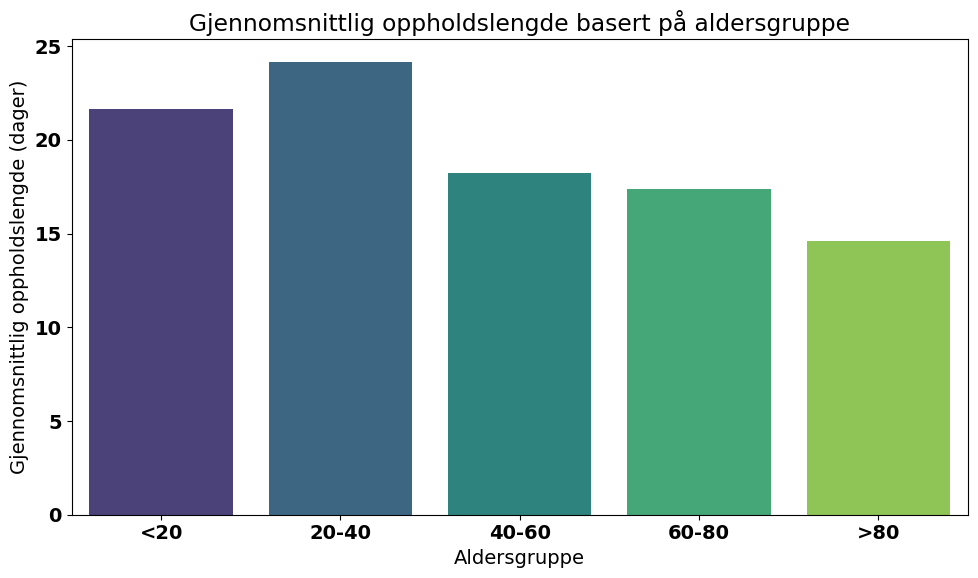

In [1421]:
# Oppholdslengde basert på alder.

alders_grupper = [-1, 20, 40, 60, 80, 100] 
navn_aldersgrupper = ['<20', '20-40', '40-60', '60-80', '>80']

X_train['alder_gruppe'] = pd.cut(X_train['alder'], bins=alders_grupper, labels=navn_aldersgrupper)

gjennomsnitt_oppholdslengde_per_aldergruppe = X_train.groupby('alder_gruppe').apply(
    lambda x: y_train[x.index].mean()
).reset_index(name='Gjennomsnittlig oppholdslengde')

plt.figure(figsize=(10, 6))
sns.barplot(data=gjennomsnitt_oppholdslengde_per_aldergruppe, x='alder_gruppe', y='Gjennomsnittlig oppholdslengde', palette='viridis')
plt.title('Gjennomsnittlig oppholdslengde basert på aldersgruppe')
plt.xlabel('Aldersgruppe')
plt.ylabel('Gjennomsnittlig oppholdslengde (dager)')
plt.tight_layout()
plt.show()

X_train.drop(columns=['alder_gruppe'], inplace=True)

#### Er ulike etnisiteter mer utsatt for enkelte sykdommer

Følgende funn er bemerkelsesverdige: 

* Det er en stor andel etnisitet_black som faller under sykdomskategori: sykdomskategori_COPD/CHF/Cirrhosis

* Det er en stor andel etnisitet_white som faller under sykdomskategori: sykdomskategori_cancer

* Det er en stor andel etnisitet_white som faller under sykdomskategori: sykdomskategori_coma

Dette er interessante funn, vi undersøker hva som kan være årsaken til disse funnene



#### Påvirker inntekt/velferd dødlighet (tilgang på bedre medisiner osv)?

Resultatet viser at inntekt ikke har stor innvirkning på overlevelse. 

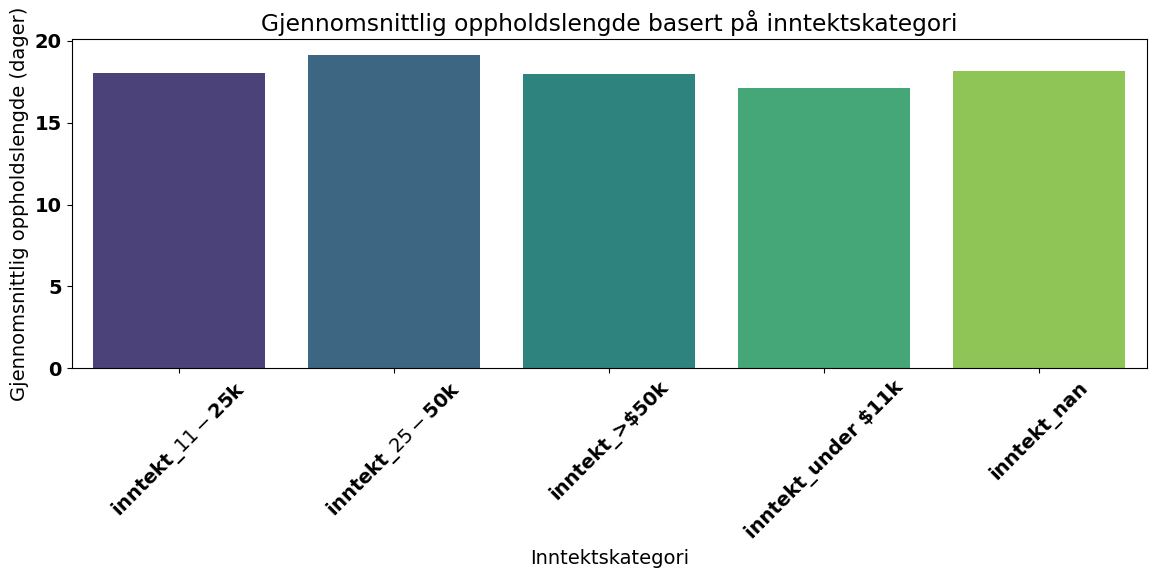

In [1422]:
# Påvirker inntekt oppholdslengde.

inntektskategorier = [col for col in X_train.columns if 'inntekt' in col]

resultater = []

for inntekt in inntektskategorier:
    
    total = X_train[X_train[inntekt] == 1].shape[0]
    
    if total > 0:
        gjennomsnitt_oppholdslengde = y_train[X_train[inntekt] == 1].mean()
        resultater.append({'Inntektskategori': inntekt, 'Gjennomsnittlig oppholdslengde': gjennomsnitt_oppholdslengde})

resultater_df = pd.DataFrame(resultater)

plt.figure(figsize=(12, 6))
sns.barplot(data=resultater_df, x='Inntektskategori', y='Gjennomsnittlig oppholdslengde', palette='viridis')
plt.title('Gjennomsnittlig oppholdslengde basert på inntektskategori')
plt.xlabel('Inntektskategori')
plt.ylabel('Gjennomsnittlig oppholdslengde (dager)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1423]:
X_train.columns

Index(['alder', 'utdanning', 'blodtrykk', 'hvite_blodlegemer',
       'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur',
       'lungefunksjon', 'serumalbumin', 'kreatinin', 'natrium', 'blod_ph',
       'glukose', 'blodurea_nitrogen', 'urinmengde', 'antall_komorbiditeter',
       'koma_score', 'adl_stedfortreder', 'fysiologisk_score',
       'apache_fysiologisk_score', 'overlevelsesestimat_2mnd',
       'overlevelsesestimat_6mnd', 'diabetes', 'demens',
       'lege_overlevelsesestimat_2mnd', 'lege_overlevelsesestimat_6mnd',
       'dnr_dag', 'kjønn_female', 'kjønn_male', 'inntekt_$11-$25k',
       'inntekt_$25-$50k', 'inntekt_>$50k', 'inntekt_under $11k',
       'inntekt_nan', 'etnisitet_asian', 'etnisitet_black',
       'etnisitet_hispanic', 'etnisitet_other', 'etnisitet_white',
       'etnisitet_nan', 'sykdomskategori_ARF/MOSF',
       'sykdomskategori_COPD/CHF/Cirrhosis', 'sykdomskategori_Cancer',
       'sykdomskategori_Coma', 'sykdom_underkategori_ARF/MOSF w/Sepsis',
  

## Visualisering (sykdomsrelaterte variabler)

#### Oversikt over oppholdslengde blant alle pasientene

Gjennomsnittlig oppholdslengde i treningsdata: 17.909242144177448 dager
Korteste oppholdslengde på sykehuset: 3 dager


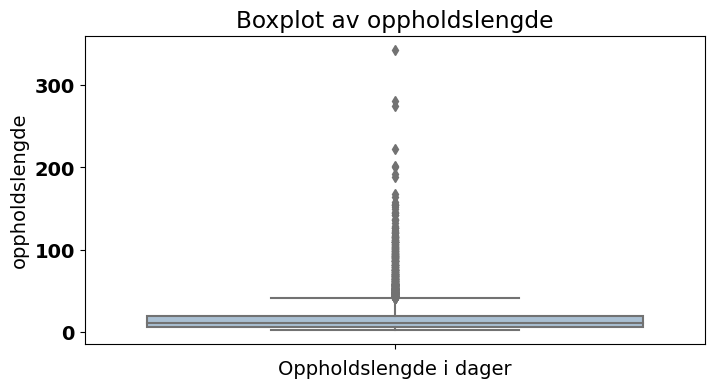

In [1424]:
# Oppholdslengde blant pasientene.

print(f'Gjennomsnittlig oppholdslengde i treningsdata: {y_train.mean()} dager')
print(f'Korteste oppholdslengde på sykehuset: {min(y_train)} dager')

plt.figure(figsize=(8, 4))
sns.boxplot(y=y_train, color='#A3C1DA')

plt.title('Boxplot av oppholdslengde')
plt.xlabel('Oppholdslengde i dager')
plt.show()

## Forekomst av sykdoms_underkategorier blant ulike etnisiteter

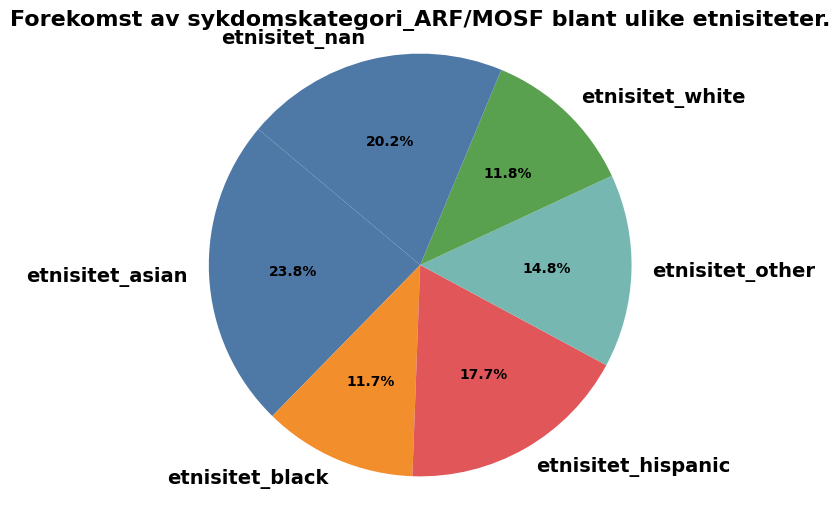

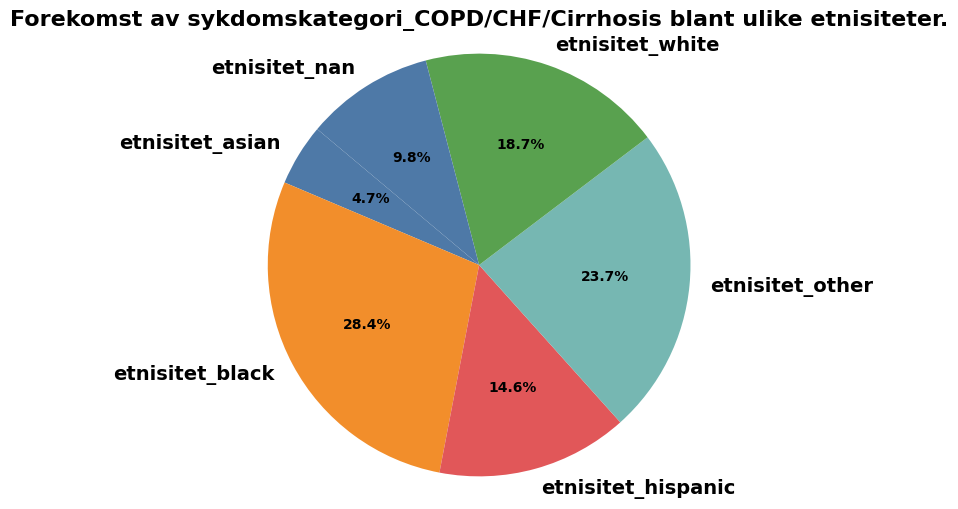

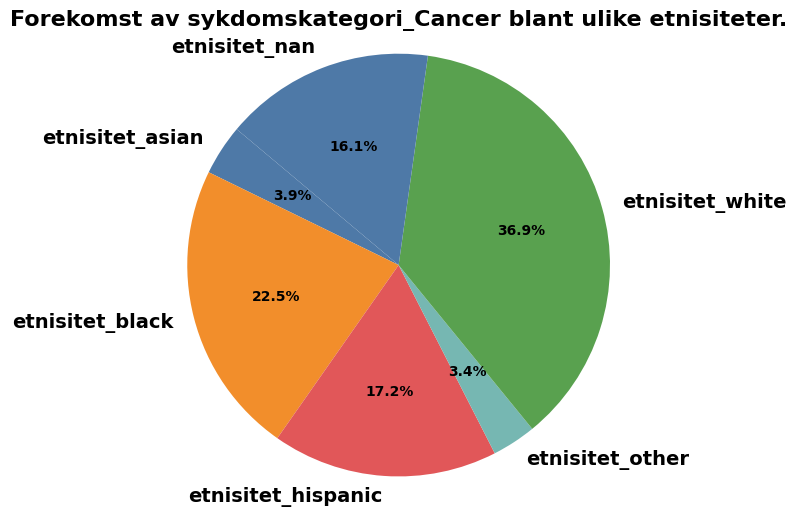

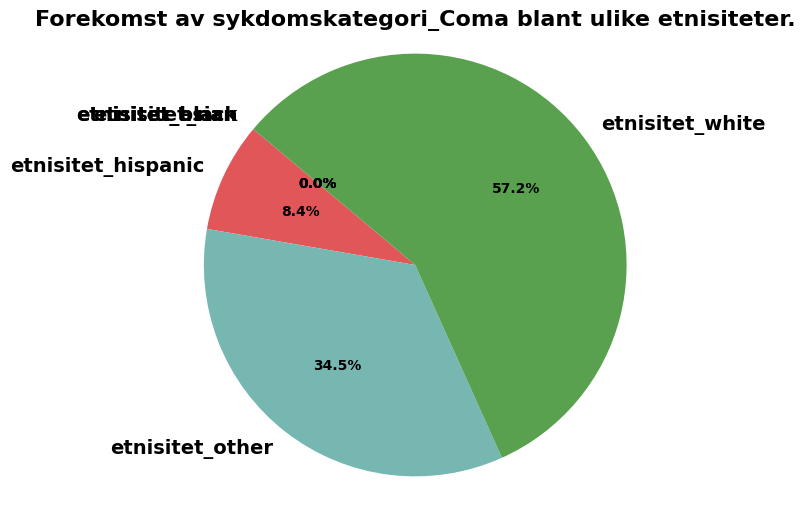

In [1425]:
# Forekomst av sykedomsunderkategorier blant ulike etnisiteter.

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', ]

ethnicities = ['etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 'etnisitet_other', 'etnisitet_white', "etnisitet_nan"]
disease_categories = ['sykdomskategori_ARF/MOSF', 
                     'sykdomskategori_COPD/CHF/Cirrhosis', 
                     'sykdomskategori_Cancer', 
                     'sykdomskategori_Coma']

total_ethnicity_counts = X_train[ethnicities].sum()

plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'}) 

for disease in disease_categories:
    disease_data = X_train[X_train[disease] == 1][ethnicities].sum()

    percentage_data = (disease_data / total_ethnicity_counts) * 100
    
    plt.figure(figsize=(6, 6))
    
    wedges, texts, autotexts = plt.pie(percentage_data, labels=percentage_data.index, 
                                       autopct='%1.1f%%', startangle=140, 
                                       colors=colors, 
                                       textprops={'fontsize': 10})
    

    plt.title(f'Forekomst av {disease} blant ulike etnisiteter.', fontsize=16, fontweight='bold')
    

    plt.axis('equal') 
    
    for text in texts:
        text.set_fontsize(14)
        text.set_fontweight('bold')
    
    plt.show()

## Korrelasjonsmatrise over kun fysiologisk faktorer

Oversikt over variabler tilknyttet fysiologiske variabler kan hjelpe med å diagnosere og behandle pasienter på sykehuset. Man får en oversikt over hvilke variabler som henger sammen.

Av de fysiologiske variablene ser vi tydelig at kreatinin og blodurea_nitrogen korrelerer sterkt. (Dette er fordi begge er avfallsprodukter som dannes under metabolismen av protein og muskler, og de gir viktig informasjon om nyrefunksjonen.)

Kreatinin og blod_ph har en sterk negativ korrelasjon fordi nrår nyrefunksjonen svekkes, akkumuleres kreatinin i blodet.

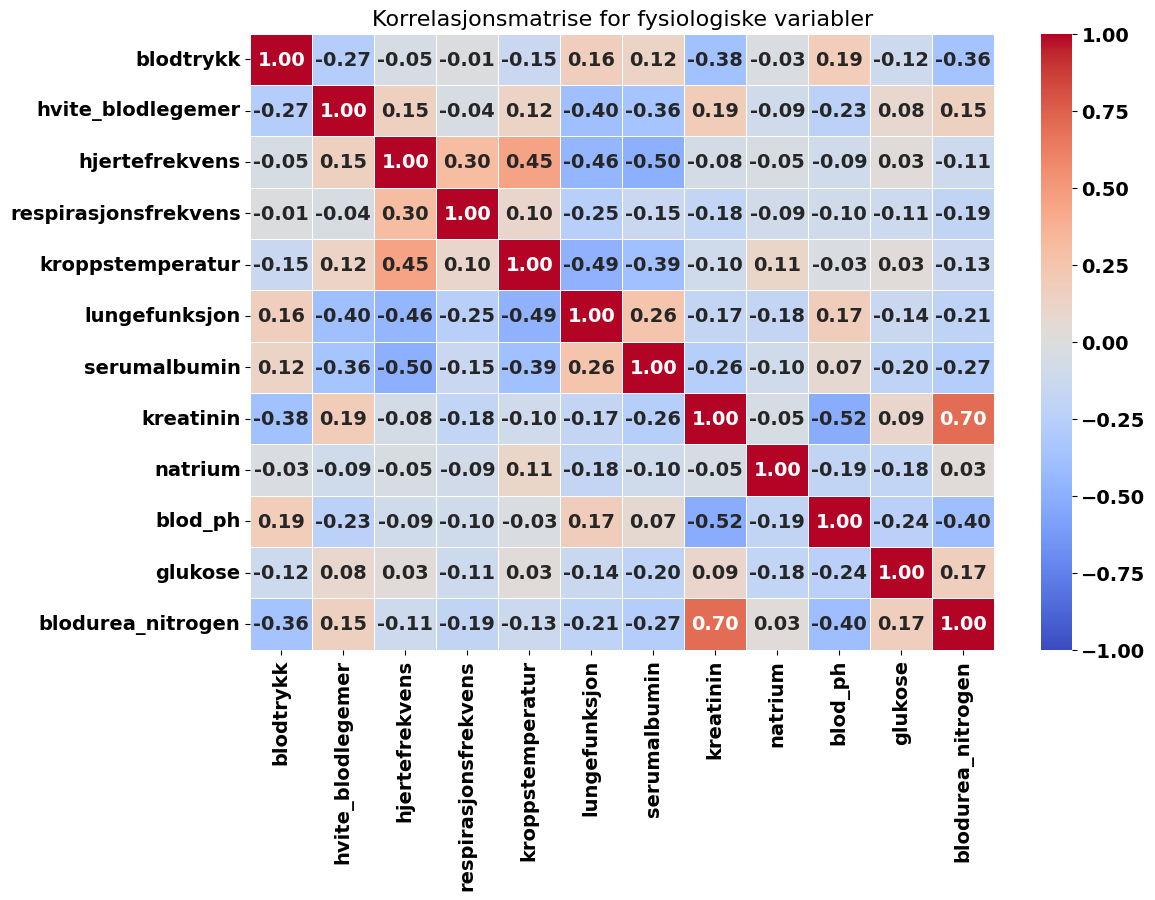

In [1426]:
# Korrelasjonsmatrise for fysiologiske variabler.

phychological_columns =  [
    'blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 
    'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 
    'serumalbumin', 'kreatinin', 'natrium', 
    'blod_ph', 'glukose', 'blodurea_nitrogen'
]

korrelasjons_matrise = X_train[phychological_columns].corr()
korrelasjons_matrise = korrelasjons_matrise.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(korrelasjons_matrise, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Korrelasjonsmatrise for fysiologiske variabler', fontsize=16)
plt.show()

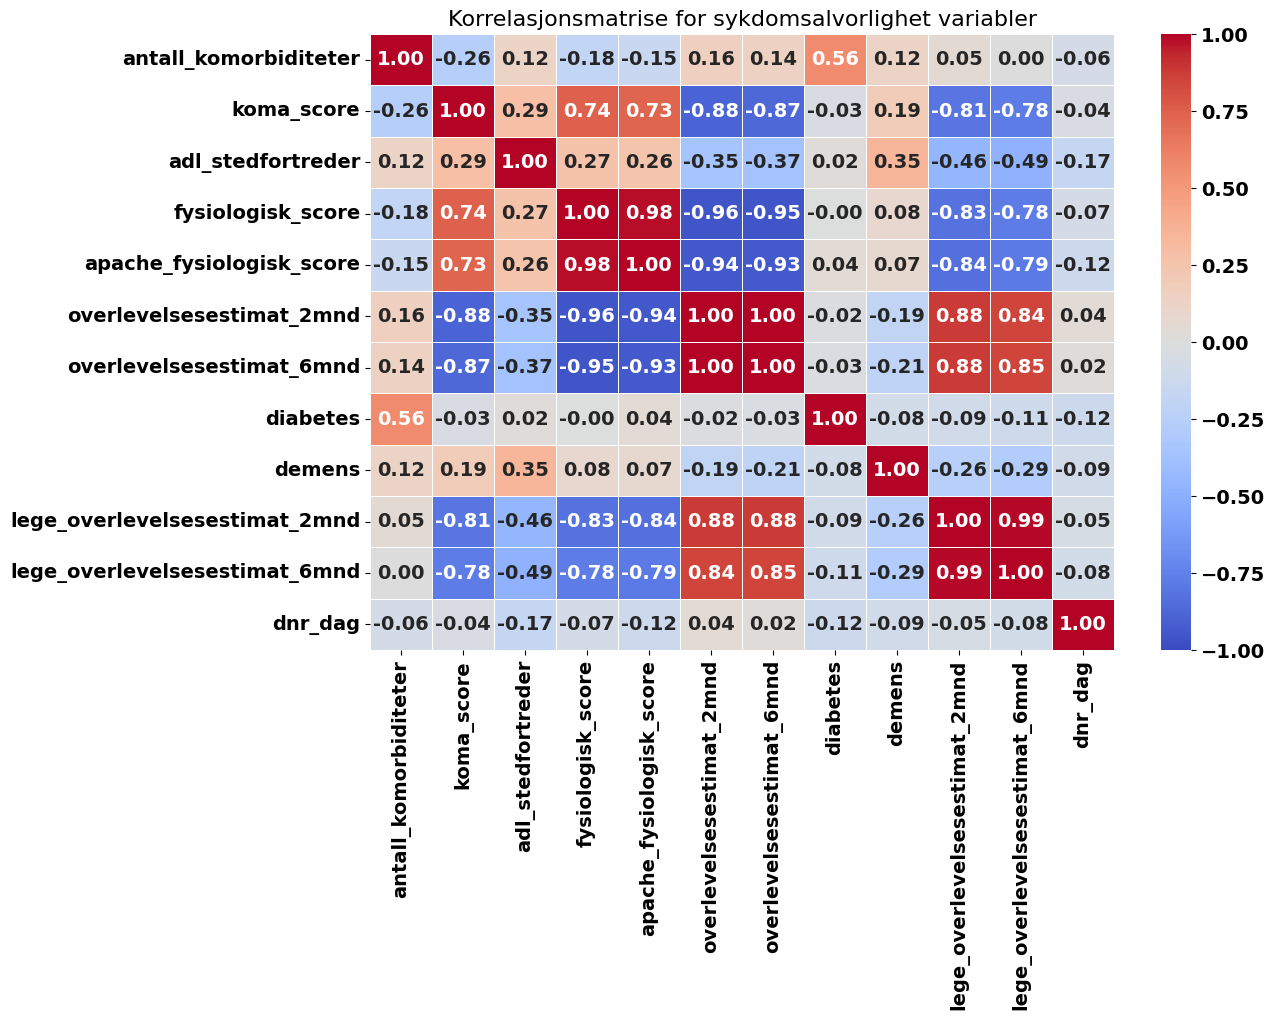

In [1427]:
# Korrelasjonsmatrise for variabler i sykdomsalvorlighetsdata.

severity_columns = ['antall_komorbiditeter', 'koma_score',
       'adl_stedfortreder', 'fysiologisk_score', 'apache_fysiologisk_score',
       'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd', 'diabetes',
       'demens','lege_overlevelsesestimat_2mnd',
       'lege_overlevelsesestimat_6mnd', 'dnr_dag']

korrelasjons_matrise = X_train[severity_columns].corr()
korrelasjons_matrise = korrelasjons_matrise.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(korrelasjons_matrise, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Korrelasjonsmatrise for sykdomsalvorlighet variabler', fontsize=16)
plt.show()

In [1428]:
# Fra korrelasjonsmatrisen over merker vi oss variablene som korrelerer mer enn +-0.95.

høyt_korrelerende_variabler = ["lege_overlevelsesestimat_2mnd", "lege_overlevelsesestimat_6mnd", "apache_fysiologisk_score"]

X_train = X_train.drop(columns=høyt_korrelerende_variabler)
X_val = X_val.drop(columns=høyt_korrelerende_variabler)
X_test = X_test.drop(columns=høyt_korrelerende_variabler) # fjerner fra testdata for å være konsistent.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



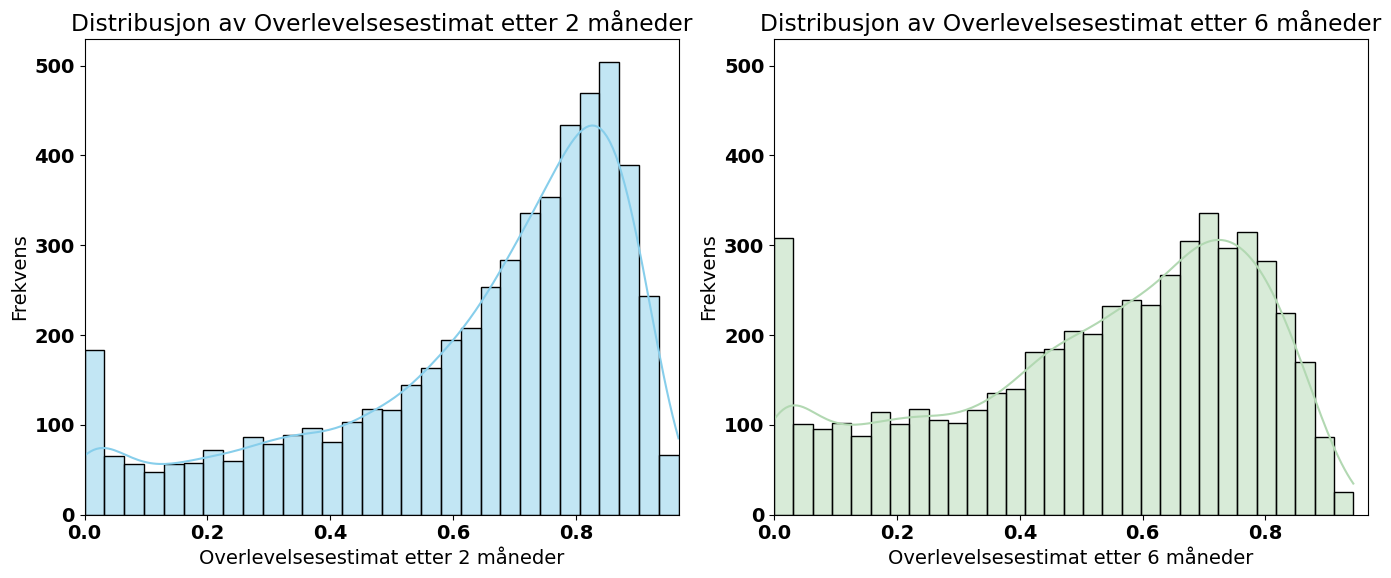

In [1429]:
# Oversikt over overlevelsesestimat blandt pasientene.

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(X_train['overlevelsesestimat_2mnd'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusjon av Overlevelsesestimat etter 2 måneder')
axes[0].set_xlabel('Overlevelsesestimat etter 2 måneder')
axes[0].set_ylabel('Frekvens')

sns.histplot(X_train['overlevelsesestimat_6mnd'], bins=30, kde=True, ax=axes[1], color='#B2D8B2')
axes[1].set_title('Distribusjon av Overlevelsesestimat etter 6 måneder')
axes[1].set_xlabel('Overlevelsesestimat etter 6 måneder')
axes[1].set_ylabel('Frekvens')

x_limits = (min(X_train['overlevelsesestimat_2mnd'].min(), X_train['overlevelsesestimat_6mnd'].min()), 
            max(X_train['overlevelsesestimat_2mnd'].max(), X_train['overlevelsesestimat_6mnd'].max()))
y_limits = (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])) 

axes[0].set_xlim(x_limits)
axes[1].set_xlim(x_limits)
axes[0].set_ylim(y_limits)
axes[1].set_ylim(y_limits)

plt.tight_layout()
plt.show()

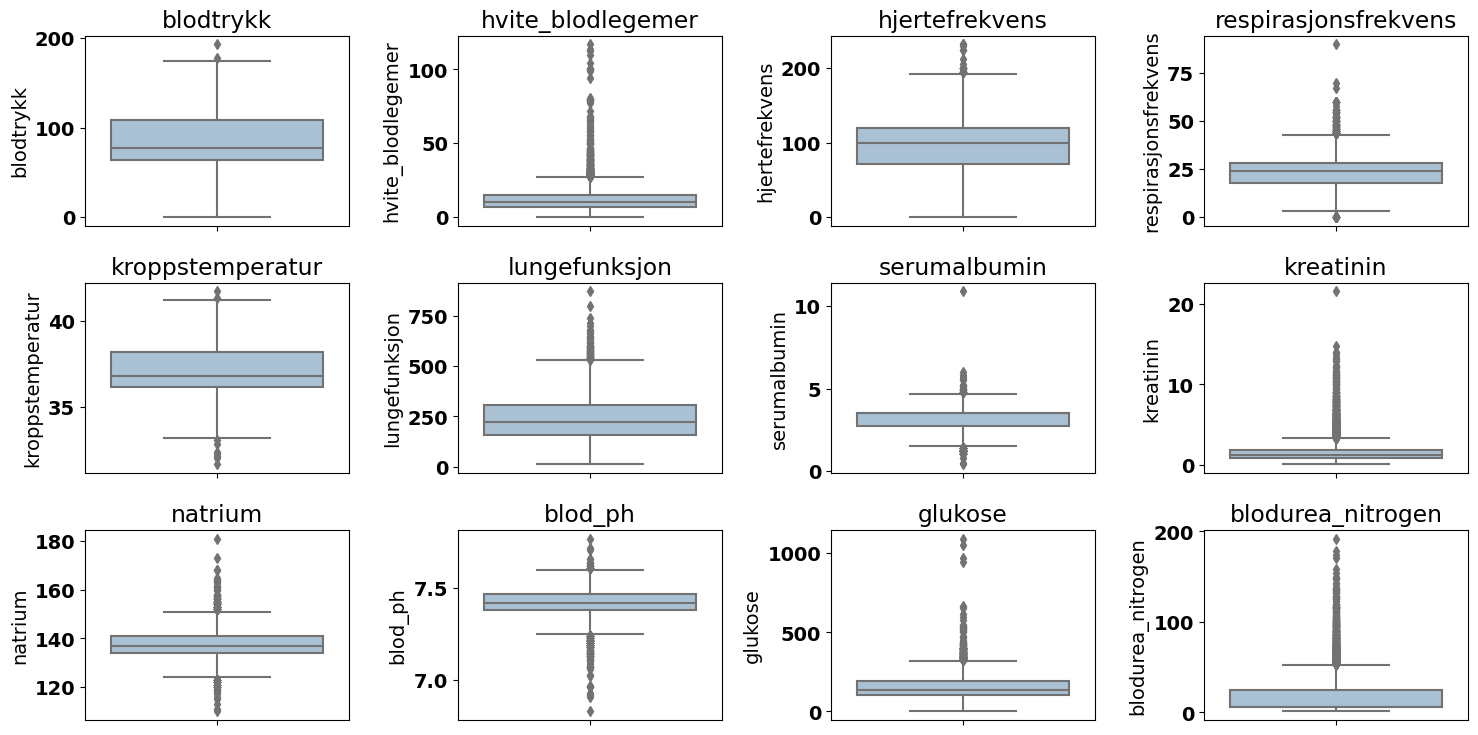

In [1430]:
# Undersøker uteliggere i fysiologisk data.

phychological_columns =  [
    'blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 
    'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 
    'serumalbumin', 'kreatinin', 'natrium', 
    'blod_ph', 'glukose', 'blodurea_nitrogen'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(phychological_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=X_train, y=column, color="#A3C1DA")
    plt.title(column)
plt.tight_layout()
plt.show()

In [1431]:
# I RAPPORTEN, ARGUMENTER FOR HVORFOR JEG VELGER Å IKKE FJERNE UTELIGGERE.
# MÅ TA HENSYN TIL PASIENTER MED SPESIELLE SYKDOMMER...

#uteliggere er ikke nødvendigvis feil informasjon, kan være pasienter med spesielle sykdommer som sørger for uteligger-verdier.
'''

z = 1.96

# Funksjon for å beregne og erstatte uteliggere med NaN
def replace_outliers_with_nan(df, columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        # Beregn 95% konfidensintervall
        lower_bound = mean - z * std
        upper_bound = mean + z * std
        
        # Erstatt verdier utenfor intervallet med NaN
        df[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)
    
    return df

X_train = replace_outliers_with_nan(X_train, phychological_columns)
#X_val = replace_outliers_with_nan(X_val, phychological_columns)
#X_val = replace_outliers_with_nan(X_train, phychological_columns)

'''

'\n\nz = 1.96\n\n# Funksjon for å beregne og erstatte uteliggere med NaN\ndef replace_outliers_with_nan(df, columns):\n    for col in columns:\n        mean = df[col].mean()\n        std = df[col].std()\n        \n        # Beregn 95% konfidensintervall\n        lower_bound = mean - z * std\n        upper_bound = mean + z * std\n        \n        # Erstatt verdier utenfor intervallet med NaN\n        df[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)\n    \n    return df\n\nX_train = replace_outliers_with_nan(X_train, phychological_columns)\n#X_val = replace_outliers_with_nan(X_val, phychological_columns)\n#X_val = replace_outliers_with_nan(X_train, phychological_columns)\n\n'

# Del 2 - modellering

In [1432]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [1433]:
# Undersøker hvilke kolonner det finnes NaN verdier i. 

nan_counts = X_train.isna().sum()

nan_counts = nan_counts[nan_counts > 0]

if not nan_counts.empty:
    print("NaN verdier funnet i følgende kolonner:")
    print(nan_counts)
else:
    print("Ingen NaN verdier funnet i spesifiserte kolonner.")



NaN verdier funnet i følgende kolonner:
utdanning             977
lungefunksjon        1355
blod_ph              1330
glukose              2667
adl_stedfortreder    1685
dnr_dag              4661
dtype: int64


## Neste steg 

* Oppdatere datavisualiseringer (ytte ut visualiseringer med "dødlghet", da dette ikke er relevant lenger)
* Oppdatere rapporten henholdsvis
* Fikse strukturen på .ipynb fielen (rotete nå)
* Kommentere på de nye stegene jeg har gjort
* Se på generaliseringsevne
* I rapporten: argumentere for hvorfor jeg bruker disse modellene
* Forklare hvorfor man definerer baseline modell
* FInn ut hvorfor X_val og y_val har 1159 og ikke 1160

In [1434]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [1435]:
print(y_test.mean())
print(y_train.mean())
print(X_train.shape)
print(X_train.columns)

18.501724137931035
17.909242144177448
(5410, 55)
Index(['alder', 'utdanning', 'blodtrykk', 'hvite_blodlegemer',
       'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur',
       'lungefunksjon', 'serumalbumin', 'kreatinin', 'natrium', 'blod_ph',
       'glukose', 'blodurea_nitrogen', 'urinmengde', 'antall_komorbiditeter',
       'koma_score', 'adl_stedfortreder', 'fysiologisk_score',
       'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd', 'diabetes',
       'demens', 'dnr_dag', 'kjønn_female', 'kjønn_male', 'inntekt_$11-$25k',
       'inntekt_$25-$50k', 'inntekt_>$50k', 'inntekt_under $11k',
       'inntekt_nan', 'etnisitet_asian', 'etnisitet_black',
       'etnisitet_hispanic', 'etnisitet_other', 'etnisitet_white',
       'etnisitet_nan', 'sykdomskategori_ARF/MOSF',
       'sykdomskategori_COPD/CHF/Cirrhosis', 'sykdomskategori_Cancer',
       'sykdomskategori_Coma', 'sykdom_underkategori_ARF/MOSF w/Sepsis',
       'sykdom_underkategori_CHF', 'sykdom_underkategori_COPD

### Modell 1: Grunnlinjemodell

In [1436]:
# Modell 1: Grunnlinjemodell

median_oppholdslenge = y_train.median()
print(f'Median oppholdslengde: {median_oppholdslenge}\n')

# Funksjon for å beregne RMSE.

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

baseline = DummyRegressor(strategy="median") # modellen imputerer alltid medianverdien av den avhengige variabelen.

baseline.fit(X_train, y_train)  # Tilpasser modellen til treningsdata
prediction = baseline.predict(X_val)  # Predikerer med baseline på valideringsdata
rmse_baseline = root_mean_squared_error(y_val, prediction)  # Beregner RMSE
print(f'RMSE for grunnlinjemodell: {rmse_baseline}')


Median oppholdslengde: 11.0

RMSE for grunnlinjemodell: 19.487324700589227


### Oppretter Pipeline

In [1437]:
# Oppretter en Pipeline. Denne brukes i RandomizedSearchCV. 

pipeline = Pipeline([
    ('strat', 'passthrough'), 
    ('scaler', 'passthrough'), 
    ('model', 'passthrough')   
])

### Modell 2: Gradient Boosting Regressor

In [1438]:
# Modell 2: Gradient Boosting Regressor.  

# Hyperparametre for Gradient Boosting Regressor. 
gradient_boosting_parametre = [
    {
        'strat': [SimpleImputer()],
        'strat__strategy': ['mean', 'median'],
        'scaler': [StandardScaler()],
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 7]
    },
    {
        'strat': [KNNImputer()],
        'strat__n_neighbors': [3, 5],
        'scaler': [StandardScaler()],
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 7]
    }
]

# RandomizedSearchCV for Ranodm Forest Regressor.
gb_search = RandomizedSearchCV(pipeline, gradient_boosting_parametre, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)
gb_search.fit(X_train, y_train)


# Få beste modell og hyperparametere. 
best_gb = gb_search.best_estimator_
print(f"Beste hyperparametere for GradientBoosting: {gb_search.best_params_}")
gb_rmse = root_mean_squared_error(y_val, best_gb.predict(X_val))
print(f"Beste RMSE for GradientBoosting: {gb_rmse}")

Beste hyperparametere for GradientBoosting: {'strat__strategy': 'mean', 'strat': SimpleImputer(), 'scaler': StandardScaler(), 'model__n_estimators': 500, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model': GradientBoostingRegressor()}
Beste RMSE for GradientBoosting: 18.563332611116284


### Modell 3: Random Forest Regressor

In [1439]:
# Modell 3: Random Forest Regressor. 

from sklearn.ensemble import RandomForestRegressor

# Hyperparametere for Random Forest Regressor.
random_forest_parametre = [
    {
        'strat': [SimpleImputer()],
        'strat__strategy': ['mean', 'median'],
        'scaler': [StandardScaler()],
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'strat': [KNNImputer()],
        'strat__n_neighbors': [3, 5],
        'scaler': [StandardScaler()],
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10]
    }
]

# RandomizedSearchCV for Ranodm Forest Regressor.
rf_search = RandomizedSearchCV(pipeline, random_forest_parametre, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)


# Få beste modell og hyperparametere. 
best_rf = rf_search.best_estimator_
print(f"Beste hyperparametere for RandomForest: {rf_search.best_params_}")
rf_rmse = root_mean_squared_error(y_val, best_rf.predict(X_val))
print(f"Beste RMSE for RandomForest: {rf_rmse}")


Beste hyperparametere for RandomForest: {'strat__strategy': 'mean', 'strat': SimpleImputer(), 'scaler': StandardScaler(), 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__max_depth': 5, 'model': RandomForestRegressor()}
Beste RMSE for RandomForest: 18.475449206627022


### Modell 4: Elastic Net

In [1440]:
# Modell 4: Elastic Net.

from sklearn.linear_model import ElasticNet

# Hyperparametere for Elastic Net
elastic_net_parametere = [
    {
        'strat': [SimpleImputer()],
        'strat__strategy': ['mean', 'median'],
        'scaler': [StandardScaler()],
        'model': [ElasticNet()],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    {
        'strat': [KNNImputer()],
        'strat__n_neighbors': [3, 5],
        'scaler': [StandardScaler()],
        'model': [ElasticNet()],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    }
]

# Randomized Search for Elastic Net
en_search = RandomizedSearchCV(pipeline, elastic_net_parametere, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)

en_search.fit(X_train, y_train)


# Få beste modell og hyperparametere
best_en = en_search.best_estimator_
print(f"Beste hyperparametere for ElasticNet: {en_search.best_params_}")
en_rmse = root_mean_squared_error(y_val, best_en.predict(X_val))
print(f"Beste RMSE for ElasticNet: {en_rmse}")


Beste hyperparametere for ElasticNet: {'strat__n_neighbors': 3, 'strat': KNNImputer(), 'scaler': StandardScaler(), 'model__l1_ratio': 0.5, 'model__alpha': 0.5, 'model': ElasticNet()}
Beste RMSE for ElasticNet: 18.482907461131614


### Utforsker viktigheten av variablene på modellens ytelse

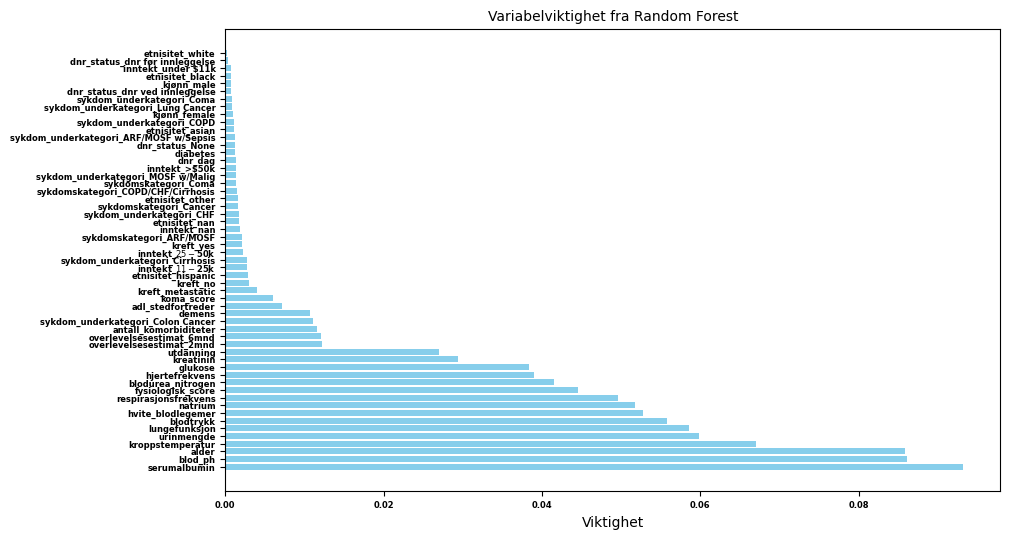

In [1485]:
# Utforsker viktigheten av variablene på modellens ytelse. 

rf_model = best_rf.named_steps['model']

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Viktighet', fontsize=10)
plt.title('Variabelviktighet fra Random Forest', fontsize=10)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

### Sjekker for beste modell

In [1463]:
# Modellresultater
model_results = [
    {'Model': 'Grunnlinjemodell', 'RMSE': rmse_baseline},
    {'Model': 'ElasticNet', 'RMSE': en_rmse},
    {'Model': 'RandomForest', 'RMSE': rf_rmse},
    {'Model': 'GradientBoosting', 'RMSE': gb_rmse}
]

# Opprett DataFrame og sorter etter RMSE
rmse_df = pd.DataFrame(model_results)
rmse_df = rmse_df.sort_values(by='RMSE').reset_index(drop=True)

# Finn den optimale modellen
optimal_model = rmse_df.iloc[0]

# Skriv ut tabellen med RMSE
display(rmse_df)

# Skriv ut den optimale modellen og RMSE
print("Beste modell:", optimal_model['Model'], "med RMSE:", optimal_model['RMSE'])


,Model,RMSE
0,RandomForest,18.475449
1,ElasticNet,18.482907
2,GradientBoosting,18.563333
3,Grunnlinjemodell,19.487325


Beste modell: RandomForest med RMSE: 18.475449206627022


In [1464]:
# # Merged datasett. 

# en_search.fit(merged_df)

# merged_df = pd.merge([X_train, X_val])

### Generaliseringesevne

In [1465]:
# Modellene som trenes.
models = {
    'elastic_net': best_en,
    'gradient_boosting': best_gb,
    'random_forest': best_rf,
    'baseline': baseline
}

# RMSE for modellene.
RMSE_models = {
    'elastic_net': en_rmse,
    'gradient_boosting': gb_rmse,
    'random_forest': rf_rmse,
    'baseline': rmse_baseline
}

optimal_model_name, optimal_rmse = min(RMSE_models.items(), key=lambda x: x[1])
optimal_model = models[optimal_model_name]

y_test_predikert = optimal_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_predikert)

print(f"Test RMSE for beste modell ({optimal_model_name}): {test_rmse}")

Test RMSE for beste modell (random_forest): 25.087759064239723


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names



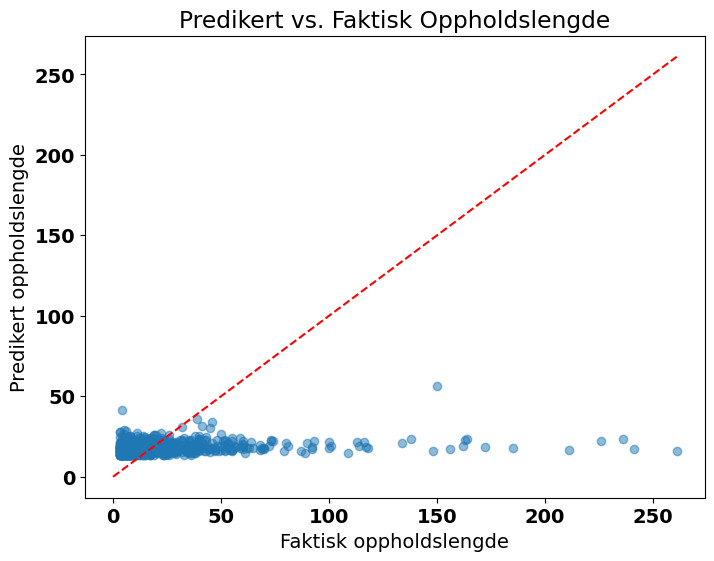

In [1466]:
# Predikert mot faktiske oppholdslengde.

plt.figure(figsize=(8, 6))

plt.scatter(x=y_test, y=y_test_predikert, alpha=0.5)

max_value = max(max(y_test), max(y_test_predikert))

# Plotter diagonal linje. Hvis punktene ligger langs linjen er predikasjoner korrekte.
plt.plot([0, max_value], [0, max_value], 'r--')

plt.xlabel('Faktisk oppholdslengde')
plt.ylabel('Predikert oppholdslengde')
plt.title('Predikert vs. Faktisk Oppholdslengde')

plt.show()

#### Kommentar predikert vs. faktisk oppholdslengde

Basert på scatterplottet du har delt, hvor predikert oppholdslengde sammenlignes med faktisk oppholdslengde, kan vi gjøre følgende observasjoner:

1. Underprediksjon for høyere verdier
Det ser ut til at de fleste faktiske oppholdslengdene ligger mellom 0 og 50 dager, men modellen ser ut til å underpredikere for verdier som er høyere enn dette.
Punkter hvor faktisk oppholdslengde er høyere enn 50, har alle mye lavere predikerte verdier. Dette er tydelig et problem med modellen, da den ikke klarer å fange opp eller forutsi lengre opphold korrekt.
2. Lav variasjon i prediksjoner
De fleste predikerte verdiene ser ut til å være svært lave, konsentrert rundt 0 til 50, uavhengig av hva den faktiske oppholdslengden er.
Dette tyder på at modellen har lav variabilitet i sine prediksjoner og muligens har en tendens til å gi lave verdier, selv når den faktiske oppholdslengden er mye høyere.
3. Systematisk skjevhet
Den røde stiplede linjen representerer perfekt prediksjon. Jo nærmere punktene er denne linjen, jo mer nøyaktig er prediksjonene.
I ditt plott ligger de fleste punktene under denne linjen, noe som tyder på at modellen gjennomgående underpredikerer oppholdslengden. Dette kan være et tegn på at modellen ikke klarer å fange opp de viktigste funksjonene eller sammenhengene i dataene.
4. Mulig over- eller underfitting
Siden prediksjonene ser ut til å være samlet rundt et lavt intervall uavhengig av den faktiske oppholdslengden, kan det være at modellen overforenkler problemet, noe som tyder på underfitting. Dette skjer når modellen er for enkel til å fange opp kompleksiteten i dataene.
Et annet potensielt problem kan være bruken av regularisering (ElasticNet), som, hvis for sterkt, kan begrense modellens evne til å tilpasse seg treningsdataene og føre til underprediksjon.
Hva kan gjøres for å forbedre modellen?
Gjennomgå funksjonene: Sørg for at du har nok meningsfulle og relevante funksjoner i datasettet som kan forklare variansen i oppholdslengden. Du kan vurdere å legge til flere funksjoner eller gjøre mer sofistikerte funksjonsutvalg.

Tuning av ElasticNet: Hvis du bruker ElasticNet-modellen, kan det være verdt å justere regulariseringsparametrene (alpha, l1_ratio). For høy regularisering kan redusere modellens ytelse på denne typen problemstilling.

Vurder en mer kompleks modell: Hvis problemet er svært komplekst, kan du prøve andre modeller som Random Forest, Gradient Boosting, eller mer avanserte nevrale nettverk som kan fange opp mer komplekse relasjoner i dataene.

Analyse av prediksjonsfeil: Det kan være nyttig å undersøke spesifikke tilfeller hvor modellen underpredikerer kraftig for å forstå om det er bestemte mønstre i dataene som modellen ikke klarer å fange opp.

Samlet sett tyder dette plottet på at modellen trenger justering for bedre å kunne håndtere lengre oppholdslengder. Modellen har en tendens til å gi lave prediksjoner selv for tilfeller der oppholdslengden er betydelig høyere, noe som kan løses ved modelljusteringer og potensielt mer komplekse metoder.

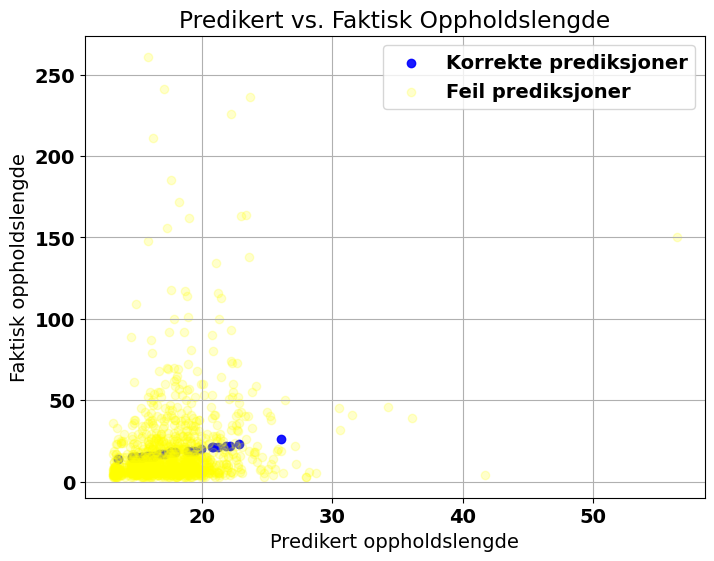

Antall korrekte prediksjoner: 28


In [1467]:
plt.figure(figsize=(8, 6))

# Definer toleransen for hva som regnes som en korrekt prediksjon
tolerance = 0.5

# Lag maskerer for treff og feil
korrekte_mask = np.abs(y_test - y_test_predikert) <= tolerance
feil_mask = ~korrekte_mask

# Plott treffene i grønt med gjennomsiktighet
plt.scatter(y_test_predikert[korrekte_mask], y_test[korrekte_mask], color='blue', label='Korrekte prediksjoner', alpha=0.9)

# Plott feilene i rødt med gjennomsiktighet
plt.scatter(y_test_predikert[feil_mask], y_test[feil_mask], color='yellow', label='Feil prediksjoner', alpha=0.2)

# Legg til etiketter og tittel
plt.xlabel('Predikert oppholdslengde')
plt.ylabel('Faktisk oppholdslengde')
plt.title('Predikert vs. Faktisk Oppholdslengde')
plt.legend()
plt.grid()

# Vis plottet
plt.show()

# Tell antall riktige prediksjoner
count = len(y_test[korrekte_mask])
print(f"Antall korrekte prediksjoner: {count}")

In [1468]:
# Kombiner trenings- og valideringsdata til en større datasett
X_train_combined = np.concatenate([X_train, X_val], axis=0)
y_train_combined = np.concatenate([y_train, y_val], axis=0)

# Tren den beste modellen på det kombinerte settet
optimal_model.fit(X_train_combined, y_train_combined)


best_combined = en_search.best_estimator_
print(f"Beste hyperparametere for ElasticNet: {en_search.best_params_}")
en_rmse = root_mean_squared_error(y_val, best_en.predict(X_val))
print(f"Beste RMSE for ElasticNet: {en_rmse}")

Beste hyperparametere for ElasticNet: {'strat__n_neighbors': 3, 'strat': KNNImputer(), 'scaler': StandardScaler(), 'model__l1_ratio': 0.5, 'model__alpha': 0.5, 'model': ElasticNet()}
Beste RMSE for ElasticNet: 18.482907461131614


In [1469]:
#lagrer modellen til brukk i app.py
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(en_search, f)

### Predikere oppholdslengde blant pasienter i Sampledata

Samme behandling som i raw_data

In [1470]:
demographic_sample_df = pd.read_csv("./sample_data/demographic.csv")
hospital_sample_df = pd.read_csv("./sample_data/hospital.csv")
physiological_sample_df = pd.read_csv("./sample_data/physiological.txt", sep="\t")
severity_sample_df = pd.read_json("./sample_data/severity.json")

In [1471]:
# Substituerer NaN verdier i fysiologiske data med eksempelverdier. 

phychological_df["serumalbumin"].fillna(3.5,inplace=True)
phychological_df["bilirubin"].fillna(1.01,inplace=True)
phychological_df["kreatinin"].fillna(1.01,inplace=True)
phychological_df["hvite_blodlegemer"].fillna(9,inplace=True) 
phychological_df["urinmengde"].fillna(2502,inplace=True)
phychological_df["blodurea_nitrogen"].fillna(6.5, inplace=True)


C:\Users\andre\AppData\Local\Temp\ipykernel_13228\4284118894.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\andre\AppData\Local\Temp\ipykernel_13228\4284118894.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [1472]:
columns_to_list = severity_sample_df.columns.to_list()
valid_columns = columns_to_list[2:]
severity_sample_df = severity_sample_df.explode(valid_columns, ignore_index=True)

In [1473]:
demographic_sample_df = demographic_sample_df.drop_duplicates()

# Tilbakestiller indeksene.

demographic_sample_df = demographic_sample_df.reset_index(drop=True)
hospital_sample_df = hospital_sample_df.reset_index(drop=True).drop(columns=['pasient_id'])
physiological_sample_df = physiological_sample_df.reset_index(drop=True).drop(columns=['pasient_id'])
severity_sample_df = severity_sample_df.reset_index(drop=True).drop(columns=['pasient_id'])

# Slår så sammen datasettene til et stort datasett: df
df_sample = pd.concat([demographic_sample_df, hospital_sample_df, physiological_sample_df, severity_sample_df], axis=1)

In [1474]:
df_sample.head()

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,sykdomskategori,dødsfall,sykdom_underkategori,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,kreft,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_status,dnr_dag
0,1,62.84998,male,11.0,$11-$25k,other,0,97.0,6.000000,69.0,22.0,36.00000,388.000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,2,37.0,None,None,22.398438,21.0,0.823975,0.764893,0,0,no,None,None,no dnr,10.0
1,22,48.70398,male,16.0,NaN,other,0,66.0,12.500000,125.0,30.0,37.00000,170.000,NaN,NaN,1.000000,133.0,7.519531,NaN,NaN,NaN,A1s,ARF/MOSF,1,MOSF w/Malig,2,26.0,None,0.0,36.09375,78.0,0.171997,0.08699,0,0,yes,0.1,0.001,no dnr,21.0
2,25,29.36099,female,17.0,$25-$50k,white,0,96.0,10.599609,112.0,20.0,37.00000,NaN,3.699707,1.399902,0.599976,137.0,NaN,NaN,NaN,NaN,A1s,ARF/MOSF,1,ARF/MOSF w/Sepsis,1,0.0,None,0.0,26.0,32.0,0.738892,0.657959,0,0,no,0.9,0.9,no dnr,61.0
3,26,53.84000,male,NaN,under $11k,white,0,134.0,7.799805,106.0,22.0,37.89844,304.125,3.799805,0.500000,0.799927,141.0,7.379883,NaN,NaN,NaN,A1s,ARF/MOSF,1,ARF/MOSF w/Sepsis,2,37.0,None,None,21.5,30.0,0.642944,0.541992,0,1,no,None,None,dnr ved innleggelse,4.0
4,29,30.10799,male,NaN,NaN,asian,0,92.0,8.798828,112.0,27.0,37.59375,225.000,NaN,NaN,0.399963,134.0,7.459961,NaN,NaN,NaN,A1s,ARF/MOSF,0,ARF/MOSF w/Sepsis,1,9.0,None,None,31.097656,48.0,0.703979,0.61499,0,0,no,0.1,0.001,no dnr,120.0


In [1475]:
# One hot encoding på sample data.

cols_to_encode_sample = ["kjønn", "inntekt", "etnisitet", "sykdomskategori", "sykdom_underkategori", "kreft", "dnr_status"]

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_data = one_hot_encoder.fit_transform(df_sample[cols_to_encode_sample])

encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(cols_to_encode_sample))

df_sample_encoded = pd.concat([df_sample.drop(columns=cols_to_encode_sample), encoded_df], axis=1)

df_sample_encoded.head()

,pasient_id,alder,utdanning,sykehusdød,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,kroppstemperatur,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori_id,dødsfall,antall_komorbiditeter,koma_score,adl_pasient,adl_stedfortreder,fysiologisk_score,apache_fysiologisk_score,overlevelsesestimat_2mnd,overlevelsesestimat_6mnd,diabetes,demens,lege_overlevelsesestimat_2mnd,lege_overlevelsesestimat_6mnd,dnr_dag,kjønn_female,kjønn_male,inntekt_$11-$25k,inntekt_$25-$50k,inntekt_>$50k,inntekt_under $11k,inntekt_nan,etnisitet_asian,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,etnisitet_nan,sykdomskategori_ARF/MOSF,sykdomskategori_COPD/CHF/Cirrhosis,sykdomskategori_Cancer,sykdomskategori_Coma,sykdom_underkategori_ARF/MOSF w/Sepsis,sykdom_underkategori_CHF,sykdom_underkategori_COPD,sykdom_underkategori_Cirrhosis,sykdom_underkategori_Colon Cancer,sykdom_underkategori_Coma,sykdom_underkategori_Lung Cancer,sykdom_underkategori_MOSF w/Malig,kreft_metastatic,kreft_no,kreft_yes,dnr_status_dnr før innleggelse,dnr_status_dnr ved innleggelse,dnr_status_no dnr,dnr_status_None
0,1,62.84998,11.0,0,97.0,6.000000,69.0,22.0,36.00000,388.000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,A1s,0,2,37.0,None,None,22.398438,21.0,0.823975,0.764893,0,0,None,None,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,22,48.70398,16.0,0,66.0,12.500000,125.0,30.0,37.00000,170.000,NaN,NaN,1.000000,133.0,7.519531,NaN,NaN,NaN,A1s,1,2,26.0,None,0.0,36.09375,78.0,0.171997,0.08699,0,0,0.1,0.001,21.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,25,29.36099,17.0,0,96.0,10.599609,112.0,20.0,37.00000,NaN,3.699707,1.399902,0.599976,137.0,NaN,NaN,NaN,NaN,A1s,1,1,0.0,None,0.0,26.0,32.0,0.738892,0.657959,0,0,0.9,0.9,61.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,26,53.84000,NaN,0,134.0,7.799805,106.0,22.0,37.89844,304.125,3.799805,0.500000,0.799927,141.0,7.379883,NaN,NaN,NaN,A1s,1,2,37.0,None,None,21.5,30.0,0.642944,0.541992,0,1,None,None,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,29,30.10799,NaN,0,92.0,8.798828,112.0,27.0,37.59375,225.000,NaN,NaN,0.399963,134.0,7.459961,NaN,NaN,NaN,A1s,0,1,9.0,None,None,31.097656,48.0,0.703979,0.61499,0,0,0.1,0.001,120.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1476]:
# Gjør variabler numeriske

df_sample_encoded[['dødsfall','antall_komorbiditeter' ,'koma_score' ,'adl_pasient' ,'adl_stedfortreder' ,'fysiologisk_score' ,'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens', 'lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']] = df_sample_encoded[['dødsfall', 'antall_komorbiditeter', 'koma_score', 'adl_pasient', 'adl_stedfortreder', 'fysiologisk_score','apache_fysiologisk_score' ,'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd','diabetes', 'demens','lege_overlevelsesestimat_2mnd','lege_overlevelsesestimat_6mnd', 'dnr_dag']].apply(pd.to_numeric)

In [1477]:
# Fjerner irrelevante kolonner. Se begrunnelse for hvorfor under behandling av raw_data.

irrelevant_columns = ["dødsfall", "pasient_id", "sykehusdød", "adl_pasient", "bilirubin", "sykdomskategori_id", "lege_overlevelsesestimat_2mnd", "lege_overlevelsesestimat_6mnd", "apache_fysiologisk_score", 'dnr_status_no dnr']

df_sample_encoded = df_sample_encoded.drop(columns=irrelevant_columns, axis=1)

In [1478]:
# Predikerer oppholdslengde i sample data og lagrer i csv-fil.

predicted_oppholdslengde = optimal_model.predict(df_sample_encoded)

df_predictions = df_sample_encoded.copy()

df_predictions['predikert_oppholdslengde'] = predicted_oppholdslengde

# Lagrer predikasjoner i predictions.csv. Vedlagt i prosjekt mappen.
df_predictions.to_csv("predictions.csv", index=False)

print("Predictions saved to sample_data_predikert_oppholdslengde.csv")

Predictions saved to sample_data_predikert_oppholdslengde.csv


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names



In [1479]:

'''
binary_columns = [
    'kjønn_female', 'kjønn_male',
    'inntekt_$11-$25k', 'inntekt_$25-$50k', 'inntekt_>$50k', 'inntekt_under $11k', 'inntekt_nan',
    'etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 'etnisitet_other', 
    'etnisitet_white', 'etnisitet_nan',
    'sykdomskategori_ARF/MOSF', 'sykdomskategori_COPD/CHF/Cirrhosis', 
    'sykdomskategori_Cancer', 'sykdomskategori_Coma',
    'sykdom_underkategori_ARF/MOSF w/Sepsis', 'sykdom_underkategori_CHF', 
    'sykdom_underkategori_COPD', 'sykdom_underkategori_Cirrhosis', 
    'sykdom_underkategori_Colon Cancer', 'sykdom_underkategori_Coma', 
    'sykdom_underkategori_Lung Cancer', 'sykdom_underkategori_MOSF w/Malig',
    'kreft_metastatic', 'kreft_no', 'kreft_yes'
]

# Filtering out binary columns to get numeric columns
numeric_columns = [col for col in X_test.columns if col not in binary_columns]

# Calculating median for numeric columns
median_values = X_test[numeric_columns].median()

# Convert to dictionary
median_dict = median_values.to_dict()

# Print or use the median_dict as needed
print(median_dict)
'''

"\nbinary_columns = [\n    'kjønn_female', 'kjønn_male',\n    'inntekt_$11-$25k', 'inntekt_$25-$50k', 'inntekt_>$50k', 'inntekt_under $11k', 'inntekt_nan',\n    'etnisitet_asian', 'etnisitet_black', 'etnisitet_hispanic', 'etnisitet_other', \n    'etnisitet_white', 'etnisitet_nan',\n    'sykdomskategori_ARF/MOSF', 'sykdomskategori_COPD/CHF/Cirrhosis', \n    'sykdomskategori_Cancer', 'sykdomskategori_Coma',\n    'sykdom_underkategori_ARF/MOSF w/Sepsis', 'sykdom_underkategori_CHF', \n    'sykdom_underkategori_COPD', 'sykdom_underkategori_Cirrhosis', \n    'sykdom_underkategori_Colon Cancer', 'sykdom_underkategori_Coma', \n    'sykdom_underkategori_Lung Cancer', 'sykdom_underkategori_MOSF w/Malig',\n    'kreft_metastatic', 'kreft_no', 'kreft_yes'\n]\n\n# Filtering out binary columns to get numeric columns\nnumeric_columns = [col for col in X_test.columns if col not in binary_columns]\n\n# Calculating median for numeric columns\nmedian_values = X_test[numeric_columns].median()\n\n# Convert 